In [2]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import numpy as np
import jax

(20, 5) (20, 5)
(20, 5) (20, 5)


|██████████| 100.0% ◆ elapsed 15.60s ◆ remaining 0.00ms  
100%|██████████| 50/50 [01:30<00:00,  1.80s/it]
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


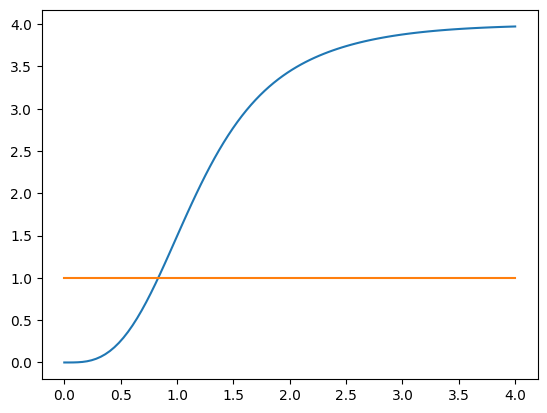

In [3]:
T = 4 # Time
g_2 = 1
e_d = -4
k_b = 10
na = 20 # Hilbert space dimension
nb = 5 # Hilbert space dimension
a = dq.destroy(na) # Annihilation operator
b = dq.destroy(nb) # Annihilation operator
a_dag = dq.create(na) # Creation operator
b_dag = dq.create(nb) # Creation operator
a_id, id = dq.destroy(na, nb)
id, id_bdag = dq.create(na, nb)
H_2ph = g_2 * dq.tensor(a_dag @ a_dag, b) + dq.dag(g_2* dq.tensor(a_dag @ a_dag, b))  # 2 photon exchange hamiltonian
H_d = dq.dag(e_d * id_bdag) + (e_d * id_bdag) # buffer drive hamiltonian
print(H_2ph.dims, H_d.dims)
H = H_2ph + H_d # System Hamiltonian

psi0 = dq.fock((na, nb), (0, 0)) # Vacuum state
kappa_2 = 1 # two-photon loss rate
alpha = 2.0 # cat size
tsave = np.linspace(0, T, 100)
print((a_id @ a_id).dims, dq.eye(na, nb).dims)
loss_op = dq.asqarray(np.sqrt(k_b)*dq.dag(id_bdag), dims=(20,5)) # loss operator
res = dq.mesolve(H, [loss_op], psi0, tsave)
dq.plot.wigner_gif(dq.ptrace(res.states, 0, (na, nb)))

plt.plot(tsave, dq.expect(dq.number(na), dq.ptrace(res.states, 0, (na, nb)))) # Expectation value of number of photons in the memory mode vs time
plt.plot(tsave, dq.expect(dq.parity(na), dq.ptrace(res.states, 0, (na, nb)))) # Expectation value of number parity of photons vs time

Task 1.3: Performing a Zeno-gate

For part a, we simulated the time evolution that maps the even state to the odd state in time Tz.

From this paper: https://doi.org/10.1103/PRXQuantum.4.040316 we notice that the bosonic operators in the hamiltonian are nothing but the creation and annihilation operators!

From the GIF we can notice that we indeed transition from the even state to the odd state (the red band in the center changes to a blue one).

|██████████| 100.0% ◆ elapsed 2.60s ◆ remaining 0.00ms  
100%|██████████| 50/50 [01:22<00:00,  1.65s/it]


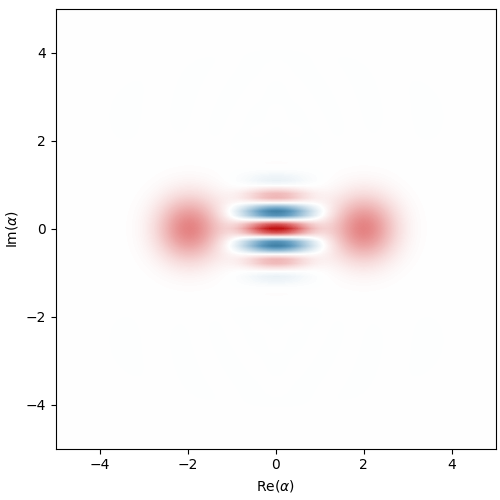

In [4]:
T_z = 4
e_z = 1 # Paramater characterizing the angle by which the state rotates about the z-axis

plus = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
minus = dq.unit(dq.coherent(na, alpha) - dq.coherent(na, -alpha))
k_a = 1 # single-photon loss rate
alpha = 2.0 # cat size
tsave = np.linspace(0, T_z, 100)
H_z = (e_z * a_dag) + dq.dag(e_z * a_dag) # Hamiltonian that performs a continuous rotation around the Z-axis of the qubit
loss_op = dq.asqarray(np.sqrt(k_a)*(a @ a - alpha**2 * dq.eye(na))) # loss operator
res = dq.mesolve(H_z, [loss_op], plus, tsave)
dq.plot.wigner_gif(res.states)
# plt.plot(tsave, dq.expect(dq.number(na), dq.ptrace(res.states, 0, (na, nb)))) # Expectation value of number of photons in the memory mode vs time

We then made plots for the expectation value of the parity as a function of time where different colors represent different values of k_a. Each plot was made having a fixed value of e_z.

|██████████| 100.0% ◆ elapsed 5.20ms ◆ remaining 0.00ms
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
|██████████| 100.0% ◆ elapsed 6.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 9.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 13.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 17.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 8.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 10.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.23ms ◆ re

Text(0, 0.5, 'Expected Parity')

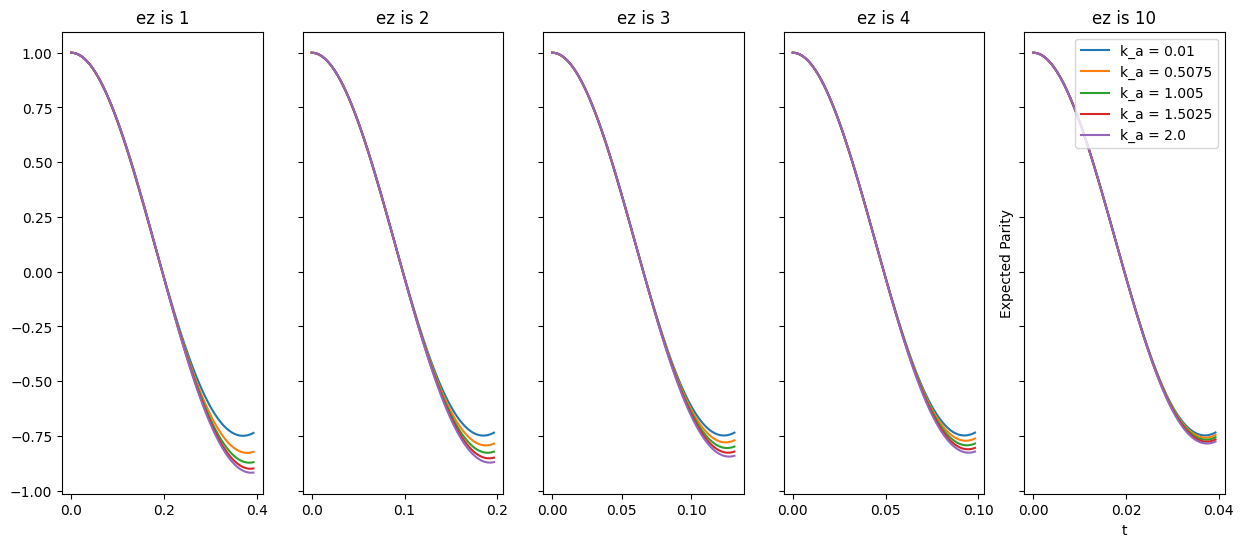

In [9]:
e_z = 1 # Paramater characterizing the angle by which the state rotates about the z-axis

plus = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
minus = dq.unit(dq.coherent(na, alpha) - dq.coherent(na, -alpha))
k_a = np.linspace(0.01, 2, num=5) # single-photon loss rate
e_zs = [1, 2, 3, 4, 10]
alpha = 2.0 # cat size
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(15, 6))
i = 0
for ez in e_zs:
    for ka in k_a:
        T_z = np.pi/(8*ez)
        tsave = np.linspace(0, T_z, 100)
        H_z = (ez * a_dag) + dq.dag(ez * a_dag) # Hamiltonian that performs a continuous rotation around the Z-axis of the qubit
        loss_op = dq.asqarray(np.sqrt(ka)*(a @ a - alpha**2 * dq.eye(na))) # loss operator
        res = dq.mesolve(H_z, [loss_op], plus, tsave)
        #dq.plot.wigner_gif(res.states)
        # plt.plot(tsave, dq.expect(dq.number(na), dq.ptrace(res.states, 0, (na, nb)))) # Expectation value of number of photons in the memory mode vs time
        axs[i].plot(tsave, dq.expect(dq.parity(na), res.states), label = f'k_a = {ka}') # Expectation value of number parity of photons vs time
        axs[i].set_title(f'ez is {ez}')
    i = i + 1

plt.legend()
#plt.title("Parity as a function of time for different single photon losses in mode a")
plt.xlabel("t")
plt.ylabel("Expected Parity")

Finally, we made a plot for the expectation value of parity as a function of time where different colors represent different values of e_z. This plot was made by taking a constant value of k_a (which was 1.5).

|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 237.14ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 122.59ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 16.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 8.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.54ms ◆ remaining 0.00ms


Text(0, 0.5, 'Expected Parity')

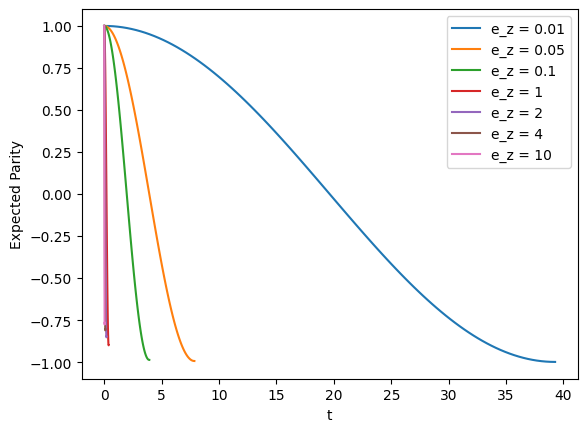

In [8]:
e_z = 1 # Paramater characterizing the angle by which the state rotates about the z-axis

plus = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
minus = dq.unit(dq.coherent(na, alpha) - dq.coherent(na, -alpha))
k_a = 1.5 # single-photon loss rate
e_zs = [0.01, 0.05, 0.1, 1, 2, 4, 10]
alpha = 2.0 # cat size
for ez in e_zs:
    T_z = np.pi/(8*ez)
    tsave = np.linspace(0, T_z, 100)
    H_z = (ez * a_dag) + dq.dag(ez * a_dag) # Hamiltonian that performs a continuous rotation around the Z-axis of the qubit
    loss_op = dq.asqarray(np.sqrt(k_a)*(a @ a - alpha**2 * dq.eye(na))) # loss operator
    res = dq.mesolve(H_z, [loss_op], plus, tsave)
    #dq.plot.wigner_gif(res.states)
    # plt.plot(tsave, dq.expect(dq.number(na), dq.ptrace(res.states, 0, (na, nb)))) # Expectation value of number of photons in the memory mode vs time
    plt.plot(tsave, dq.expect(dq.parity(na), res.states), label = f'e_z = {ez}') # Expectation value of number parity of photons vs time

plt.legend()
#plt.title("Parity as a function of time for different single photon losses in mode a")
plt.xlabel("t")
plt.ylabel("Expected Parity")

In [6]:
def loss(e_z):

    T_z = np.pi/(8*ez)
    tsave = np.linspace(0, T_z, 100)
    H_z = (ez * a_dag) + dq.dag(ez * a_dag) # Hamiltonian that performs a continuous rotation around the Z-axis of the qubit

    loss_op = dq.asqarray(np.sqrt(k_a)*(a @ a - alpha**2 * dq.eye(na))) # loss operator
    res = dq.mesolve(H_z, [loss_op], plus, tsave)
    
    return (1/e_z) / (dq.fidelity(res.states[-1], minus))

grad_loss = jax.grad(loss)

# Initial guess for epsilon_d
e_z = 1.0

# Gradient descent parameters
learning_rate = 100
num_iterations = 250

# Compile gradient function
grad_fn = jax.grad(loss, argnums=(0,))

# Store loss history
loss_history = []

# Gradient descent loop
for i in range(num_iterations):
    # Calculate gradient
    grad = grad_fn(e_z)
    # Update parameters
    e_z = e_z - learning_rate * grad[0]
    
    # Calculate and store loss
    l = loss(e_z)
    loss_history.append(l)
    
    # Print progress
    if i % 5 == 0:
        print(f"Iteration {i}, Loss: {l}")
        print(f'e_z = {e_z}')

|██████████| 100.0% ◆ elapsed 198.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.73ms ◆ remaining 0.00ms


Iteration 0, Loss: 0.009913149289786816
e_z = 115.14006042480469


|██████████| 100.0% ◆ elapsed 201.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 298.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 194.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.18ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.53ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 199.77ms ◆ remaining 0.00ms


Iteration 5, Loss: 0.00990944541990757
e_z = 115.18309020996094


|██████████| 100.0% ◆ elapsed 295.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 198.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 197.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 104.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.87ms ◆ remaining 0.00ms


Iteration 10, Loss: 0.009905747137963772
e_z = 115.22608947753906


|██████████| 100.0% ◆ elapsed 3.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 200.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.61ms ◆ remaining 0.00ms


Iteration 15, Loss: 0.009902054443955421
e_z = 115.26905822753906


|██████████| 100.0% ◆ elapsed 97.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 196.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 7.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 198.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 198.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 199.06ms ◆ remaining 0.00ms


Iteration 20, Loss: 0.009898368269205093
e_z = 115.31199645996094


|██████████| 100.0% ◆ elapsed 196.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 299.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 101.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 197.07ms ◆ remaining 0.00ms


Iteration 25, Loss: 0.009894685819745064
e_z = 115.35490417480469


|██████████| 100.0% ◆ elapsed 4.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 201.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 196.72ms ◆ remaining 0.00ms


Iteration 30, Loss: 0.009891009889543056
e_z = 115.39778137207031


|██████████| 100.0% ◆ elapsed 302.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 104.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 198.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 298.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.29ms ◆ remaining 0.00ms


Iteration 35, Loss: 0.009887339547276497
e_z = 115.44062042236328


|██████████| 100.0% ◆ elapsed 197.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 203.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 199.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 103.85ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 197.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.81ms ◆ remaining 0.00ms


Iteration 40, Loss: 0.00988367386162281
e_z = 115.48342895507812


|██████████| 100.0% ◆ elapsed 3.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 199.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.49ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.39ms ◆ remaining 0.00ms


Iteration 45, Loss: 0.009880013763904572
e_z = 115.52620697021484


|██████████| 100.0% ◆ elapsed 99.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 199.83ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.22ms ◆ remaining 0.00ms


Iteration 50, Loss: 0.00987635925412178
e_z = 115.56895446777344


|██████████| 100.0% ◆ elapsed 4.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 198.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 297.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 195.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 200.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.70ms ◆ remaining 0.00ms


Iteration 55, Loss: 0.009872710332274437
e_z = 115.6116714477539


|██████████| 100.0% ◆ elapsed 197.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 95.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 196.85ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 7.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 195.03ms ◆ remaining 0.00ms


Iteration 60, Loss: 0.009869066067039967
e_z = 115.65435791015625


|██████████| 100.0% ◆ elapsed 99.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 103.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 103.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 101.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 198.36ms ◆ remaining 0.00ms


Iteration 65, Loss: 0.009865428321063519
e_z = 115.69700622558594


|██████████| 100.0% ◆ elapsed 96.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 95.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 199.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.38ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 201.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 103.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.47ms ◆ remaining 0.00ms


Iteration 70, Loss: 0.009861796163022518
e_z = 115.7396240234375


|██████████| 100.0% ◆ elapsed 97.48ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 196.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 104.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 104.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.53ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 105.04ms ◆ remaining 0.00ms


Iteration 75, Loss: 0.009858168661594391
e_z = 115.78221130371094


|██████████| 100.0% ◆ elapsed 298.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 101.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 199.13ms ◆ remaining 0.00ms


Iteration 80, Loss: 0.009854544885456562
e_z = 115.82477569580078


|██████████| 100.0% ◆ elapsed 102.38ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 101.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 100.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.91ms ◆ remaining 0.00ms


Iteration 85, Loss: 0.009850927628576756
e_z = 115.8673095703125


|██████████| 100.0% ◆ elapsed 196.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.83ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 195.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.53ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 101.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 104.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.46ms ◆ remaining 0.00ms


Iteration 90, Loss: 0.009847316890954971
e_z = 115.90980529785156


|██████████| 100.0% ◆ elapsed 97.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 298.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.28ms ◆ remaining 0.00ms


Iteration 95, Loss: 0.009843709878623486
e_z = 115.9522705078125


|██████████| 100.0% ◆ elapsed 196.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 197.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 196.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 100.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.00ms ◆ remaining 0.00ms


Iteration 100, Loss: 0.009840109385550022
e_z = 115.99470520019531


|██████████| 100.0% ◆ elapsed 4.49ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.48ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 198.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 195.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.82ms ◆ remaining 0.00ms


Iteration 105, Loss: 0.009836513549089432
e_z = 116.037109375


|██████████| 100.0% ◆ elapsed 98.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.85ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 104.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.29ms ◆ remaining 0.00ms


Iteration 110, Loss: 0.009832922369241714
e_z = 116.07948303222656


|██████████| 100.0% ◆ elapsed 4.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 198.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 10.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.09ms ◆ remaining 0.00ms


Iteration 115, Loss: 0.009829336777329445
e_z = 116.121826171875


|██████████| 100.0% ◆ elapsed 202.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 198.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 101.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.99ms ◆ remaining 0.00ms


Iteration 120, Loss: 0.009825756773352623
e_z = 116.16413116455078


|██████████| 100.0% ◆ elapsed 2.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 100.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 203.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.86ms ◆ remaining 0.00ms


Iteration 125, Loss: 0.009822181425988674
e_z = 116.20641326904297


|██████████| 100.0% ◆ elapsed 3.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 200.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.30ms ◆ remaining 0.00ms


Iteration 130, Loss: 0.009818612597882748
e_z = 116.24866485595703


|██████████| 100.0% ◆ elapsed 198.38ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 100.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 95.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.07ms ◆ remaining 0.00ms


Iteration 135, Loss: 0.009815046563744545
e_z = 116.29088592529297


|██████████| 100.0% ◆ elapsed 4.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 101.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 202.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 197.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 198.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 201.11ms ◆ remaining 0.00ms


Iteration 140, Loss: 0.00981148798018694
e_z = 116.33307647705078


|██████████| 100.0% ◆ elapsed 2.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 200.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 191.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 201.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 109.06ms ◆ remaining 0.00ms


Iteration 145, Loss: 0.009807934053242207
e_z = 116.37522888183594


|██████████| 100.0% ◆ elapsed 103.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 195.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 201.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 101.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 200.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.95ms ◆ remaining 0.00ms


Iteration 150, Loss: 0.009804384782910347
e_z = 116.41735076904297


|██████████| 100.0% ◆ elapsed 99.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 202.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 300.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 298.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 199.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 199.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 199.09ms ◆ remaining 0.00ms


Iteration 155, Loss: 0.009800841100513935
e_z = 116.4594497680664


|██████████| 100.0% ◆ elapsed 98.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 103.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 190.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 200.77ms ◆ remaining 0.00ms


Iteration 160, Loss: 0.009797302074730396
e_z = 116.50151824951172


|██████████| 100.0% ◆ elapsed 96.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 194.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.92ms ◆ remaining 0.00ms


Iteration 165, Loss: 0.00979376770555973
e_z = 116.5435562133789


|██████████| 100.0% ◆ elapsed 98.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 193.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 198.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 197.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 103.65ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 194.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 196.18ms ◆ remaining 0.00ms


Iteration 170, Loss: 0.009790238924324512
e_z = 116.58555603027344


|██████████| 100.0% ◆ elapsed 97.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 196.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.76ms ◆ remaining 0.00ms


Iteration 175, Loss: 0.009786716662347317
e_z = 116.62753295898438


|██████████| 100.0% ◆ elapsed 5.48ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 8.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.07ms ◆ remaining 0.00ms


Iteration 180, Loss: 0.009783197194337845
e_z = 116.66947937011719


|██████████| 100.0% ◆ elapsed 5.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.50ms ◆ remaining 0.00ms


Iteration 185, Loss: 0.00977968331426382
e_z = 116.71139526367188


|██████████| 100.0% ◆ elapsed 4.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.88ms ◆ remaining 0.00ms


Iteration 190, Loss: 0.009776175953447819
e_z = 116.75328063964844


|██████████| 100.0% ◆ elapsed 4.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.71ms ◆ remaining 0.00ms


Iteration 195, Loss: 0.009772672317922115
e_z = 116.79513549804688


|██████████| 100.0% ◆ elapsed 5.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.80ms ◆ remaining 0.00ms


Iteration 200, Loss: 0.009769173339009285
e_z = 116.83695983886719


|██████████| 100.0% ◆ elapsed 5.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.48ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.18ms ◆ remaining 0.00ms


Iteration 205, Loss: 0.009765680879354477
e_z = 116.87875366210938


|██████████| 100.0% ◆ elapsed 6.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.56ms ◆ remaining 0.00ms


Iteration 210, Loss: 0.009762192144989967
e_z = 116.92052459716797


|██████████| 100.0% ◆ elapsed 4.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.45ms ◆ remaining 0.00ms


Iteration 215, Loss: 0.00975870806723833
e_z = 116.9622573852539


|██████████| 100.0% ◆ elapsed 5.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.49ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.65ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.56ms ◆ remaining 0.00ms


Iteration 220, Loss: 0.009755230508744717
e_z = 117.00395965576172


|██████████| 100.0% ◆ elapsed 6.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.83ms ◆ remaining 0.00ms


Iteration 225, Loss: 0.009751755744218826
e_z = 117.04563903808594


|██████████| 100.0% ◆ elapsed 5.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.35ms ◆ remaining 0.00ms


Iteration 230, Loss: 0.009748287498950958
e_z = 117.08728790283203


|██████████| 100.0% ◆ elapsed 3.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.21ms ◆ remaining 0.00ms


Iteration 235, Loss: 0.009744822978973389
e_z = 117.12890625


|██████████| 100.0% ◆ elapsed 5.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 6.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.20ms ◆ remaining 0.00ms


Iteration 240, Loss: 0.009741364978253841
e_z = 117.17048645019531


|██████████| 100.0% ◆ elapsed 3.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.28ms ◆ remaining 0.00ms


Iteration 245, Loss: 0.009737911634147167
e_z = 117.21204376220703


|██████████| 100.0% ◆ elapsed 3.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.68ms ◆ remaining 0.00ms
